# Assignment #05: small numpy exercises for doing Big Science

[numpy](http://www.numpy.org/) and [matplotlib](https://matplotlib.org/) are two fundamental pillars of the scientific python stack. You will find *numerous* tutorials for both libraries online. I am asking you to learn the basics of both tools by yourself, at the pace that suits you. I can recommend these two tutorials:
- [numpy tutorial](http://scipy-lectures.org/intro/numpy/index.html)
- [matplotlib tutorial](http://scipy-lectures.org/intro/matplotlib/index.html)

They can be quite long if you are new to numpy - I'm not asking to do them all today! Sections 1.3.1.1 to 1.3.1.5 in the [numpy tutorial](http://scipy-lectures.org/intro/numpy/index.html) should get you enough information for today's assignments, or you can try without it and learn on the fly - your choice!

## Exercise #05-01: numpy cycles

Monthly averages of temperature data at Innsbruck can be downloaded from this lecture's github via:

In [1]:
from urllib.request import Request, urlopen
import json

# Parse the given url
url = 'https://raw.githubusercontent.com/fmaussion/scientific_programming/master/data/innsbruck_temp.json'
req = urlopen(Request(url)).read()
# Read the data
inn_data = json.loads(req.decode('utf-8'))

*(original data obtained from NOAA's [Global Surface Summary of the Day](https://catalog.data.gov/dataset/global-surface-summary-of-the-day-gsod))*

**Explore the inn_data variable. What is the type of "inn_data", and of the data it contains? Convert the data series to numpy arrays.**

**Using numpy/scipy, matplotlib, and the standard library only, compute and plot the mean monthly annual cycle for 1981-2010 and the mean annual temperature timeseries for 1977-2017. Compute the linear trend (using scipy.stats.linregress) of the average annual temperature over 1977-2017. Repeat with winter (DJF) and summer (JJA) trends.**

*Tip 1: to select part of an array (indexing) based on a condition, you can use the following syntax:*

In [2]:
import numpy as np
x = np.arange(10)
y = x**2
y[x > 4]  # select y based on the values in x

array([25, 36, 49, 64, 81])

*Tip 2: there are more than one way to compute the annual and monthly means. Some use loops, some use reshaping on the original 1D array.*

## Exercise #05-02: indexing

Given a 2D numpy array defined as:

In [3]:
import numpy as np
x = np.array([[1, 2, 3],
              [4, 5, 6]])

The following indexing operations all select the same values out of the array:
- ``x[:, 1]``
- ``x[slice(0, 2, 1), 1]``
- ``x[(slice(0, 2, 1), 1)]``
- ``x[slice(0, 2, 1), slice(1, 2, 1)]``
- ``x[..., 1]``
- ``x[::1, 1]``
- ``x[[0, 1], 1]``
- ``x[:, -2]``
- ``x[:, 1:2]``
- ``x[:, [1]]``

This can be checked with the following test:

In [4]:
from numpy.testing import assert_equal

ref = 7

assert_equal(ref, x[:, 1].sum())
assert_equal(ref, x[..., 1].sum())
assert_equal(ref, x[::1, 1].sum())
assert_equal(ref, x[slice(0, 2, 1), 1].sum())
assert_equal(ref, x[(slice(0, 2, 1), 1)].sum())
assert_equal(ref, x[slice(0, 2, 1), slice(1, 2, 1)].sum())
assert_equal(ref, x[[0, 1], 1].sum())
assert_equal(ref, x[:, -2].sum())
assert_equal(ref, x[:, 1:2].sum())
assert_equal(ref, x[:, [1]].sum())

**Questions:**
- **What is the ``...`` syntax doing? Again, it is the literal equivalent of an actual python object: what is it?**
- **some of these indexing operations are truly equivalent to the "obvious" one, ``x[:, 1]``. List them.**
- **Classify these operations (i) in basic and advanced operations, and (ii) by the shape of their output. Explain.**
- **I'd like my array ``a = x[:, 1:2]`` to have a shape of (2, ) like most of the other operations listed above. What can I do to reshape it?**

## Exercise #05-03: the difference

Consider the following example:

In [5]:
a = np.array([1, 2, 3])
b = a
c = a

b = a - 10
c -= 100

**What will be the values printed by ``print(a, b, c)`` after this code snippet? Explain.**

## Exercise #05-04: Greenwich

[ERA-Interim reanalysis](https://www.ecmwf.int/en/forecasts/datasets/archive-datasets/reanalysis-datasets/era-interim) provides global atmospheric fields from 1979 to today. Someone prepared a grid of average temperature available here:

In [6]:
from urllib.request import Request, urlopen
from io import BytesIO
import json

# Parse the given url
url = 'https://github.com/fmaussion/scientific_programming/raw/master/data/monthly_temp.npz'
req = urlopen(Request(url)).read()
with np.load(BytesIO(req)) as data:
    temp = data['temp']
    lon = data['lon']
    lat = data['lat']

However, the data is not well processed! The longitudes are ranging from 0 to 360°, thus cutting UK and Africa in half! Reorganize the data and the corresponding coordinate to obtain a plot similar to this one:

<img src="../img/18_temp_pic.png" align='left'>

## Exercise #05-05: ACINN meteorological data

The institute website provides raw data from several stations around Innsbruck using a live feed at the following addresses:
- http://meteo145.uibk.ac.at/innsbruck/3 for the three days data
- http://meteo145.uibk.ac.at/innsbruck/7 for the seven days data

The data for the other stations are available, per analogy:
- http://meteo145.uibk.ac.at/ellboegen/3
- http://meteo145.uibk.ac.at/obergurgl/3
- http://meteo145.uibk.ac.at/sattelberg/3

The data is shared by ACINN under a [Creative Commons Attribution-ShareAlike 4.0 International License](https://creativecommons.org/licenses/by-sa/4.0/).

<a href="https://creativecommons.org/licenses/by-sa/4.0/" target="_blank">
  <img align="left" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png"/>
</a>

The data is provided in the [json](https://www.json.org/) format, often used for web applications. Fortunately, this is very easy to read in python:

In [7]:
from urllib.request import Request, urlopen
import json

url = 'http://meteo145.uibk.ac.at/innsbruck/3'
# Parse the given url
req = urlopen(Request(url)).read()
# Read the data
data = json.loads(req.decode('utf-8'))

Now I will help you to parse the timestamp of the data:

In [8]:
from datetime import datetime, timedelta
data['time'] = [datetime(1970, 1, 1) + timedelta(milliseconds=ds) for ds in data['datumsec']]

And make a first plot to get you started:

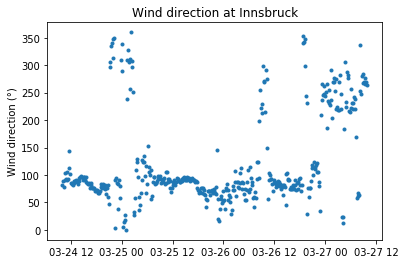

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(data['time'], data['dd'], '.');
plt.ylabel('Wind direction (°)'); 
plt.title('Wind direction at Innsbruck');

You will get much more time to get used to these data in the mid-semester projects. For today, I'm asking to **write a script that takes the station and number of days as input (either as command line arguments or user input, your choice) and prints the following information in the terminal:**

```
At station XXX, over the last X days, the dominant wind direction was XX (xx% of the time). The second most dominant wind direction was XX (xx% of the time), the least dominant wind direction was XX (xx% of the time). The maximum wind speed was XX m/s (DATE and TIME), while the strongest wind speed averaged over an hour was XX m/s (DATE and TIME).
```

With the wind directions being of 8 classes: N, NW, W, SW, S, SE, E, NE.

*Back to the [table of contents](00-Introduction.ipynb#ctoc)*